In [2]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [4]:
selected_columns = df[["Annual Income (k$)","Spending Score (1-100)"]]
selected_columns.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


* define function plot_dendogram (similarly to what we have done in the walkthrough)

In [6]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [8]:
X = selected_columns.to_numpy()#.tolist()
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

* Plot dendrogram

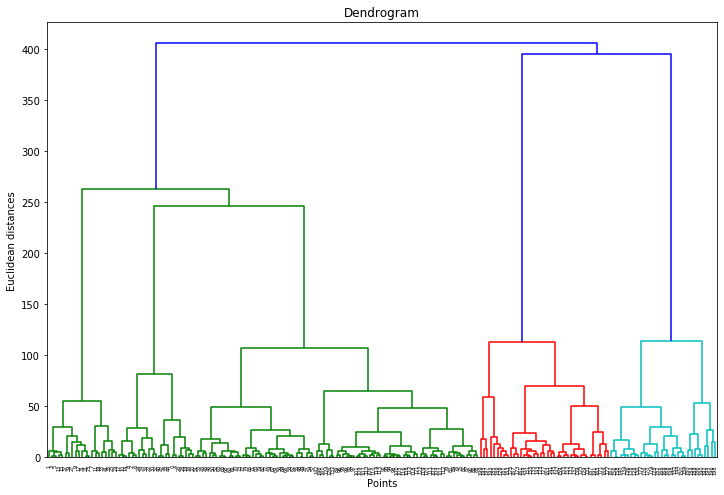

In [9]:
# Plot dendrogram
plot_dendrogram(X)

* Fit Hierarchical clustering with optimal number of clusters

In [10]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [11]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [12]:
# fit and predict
y_hc = ac.fit_predict(X)

* define function plot_clusters

In [14]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

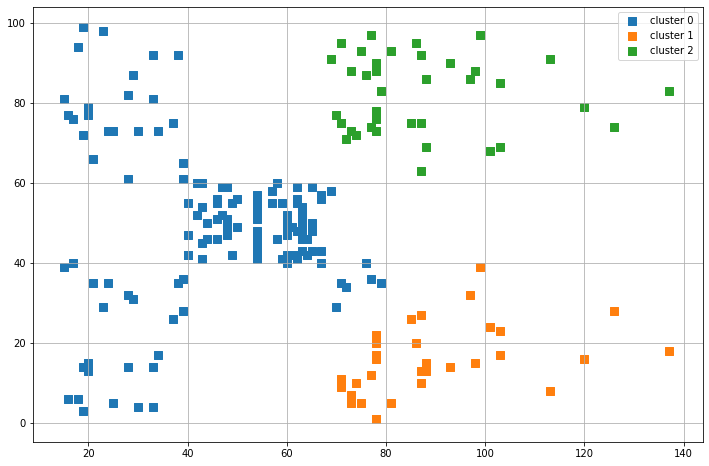

In [15]:
# Plot clustering result
plot_clusters(X,y_hc)

* Plot HC clusters